In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\US_Accidents.csv")


# Check the first few rows of the dataset
df.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,08-02-2016 00:37,08-02-2016 06:37,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,08-02-2016 05:56,08-02-2016 11:56,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,08-02-2016 06:15,08-02-2016 12:15,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,08-02-2016 06:15,08-02-2016 12:15,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,08-02-2016 06:51,08-02-2016 12:51,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [2]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                   688510
Street                        0
Side                          0
City                         69
County                        0
State                         0
Zipcode                     489
Country                       0
Timezone                   1154
Airport_Code               2658
Weather_Timestamp         22115
Temperature(F)            30743
Wind_Chill(F)            234601
Humidity(%)               32772
Pressure(in)              25460
Visibility(mi)            30815
Wind_Direction            31043
Wind_Speed(mph)           67910
Precipitation(in)        259241
Weather_Condition         30260
Amenity 

In [3]:
import pandas as pd

# Assuming 'df' is your DataFrame


# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Handling missing values for columns with a small percentage of missing values (e.g., City, Civil_Twilight)
df['City'].fillna(df['City'].mode()[0], inplace=True)  # Impute with the most frequent city
df['Civil_Twilight'].fillna(df['Civil_Twilight'].mode()[0], inplace=True)  # Impute with the most frequent value
df['Nautical_Twilight'].fillna(df['Nautical_Twilight'].mode()[0], inplace=True)  # Impute with the most frequent value
df['Astronomical_Twilight'].fillna(df['Astronomical_Twilight'].mode()[0], inplace=True)  # Impute with the most frequent value

# Handling missing values for columns with numerical data and large missing entries
df['Temperature(F)'].fillna(df['Temperature(F)'].median(), inplace=True)  # Impute with median temperature
df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].median(), inplace=True)  # Impute with median wind chill
df['Weather_Timestamp'].fillna(df['Weather_Timestamp'].mode()[0], inplace=True)  # Impute with the most frequent timestamp

# Handling missing values for 'Number' column (impute with the mode)
df['Number'].fillna(df['Number'].mode()[0], inplace=True)  # Impute with the most frequent value

# Impute missing values for the 'Airport_Code' and 'Timezone' columns (using mode or a placeholder value)
df['Airport_Code'].fillna(df['Airport_Code'].mode()[0], inplace=True)  # Impute with the most frequent value
df['Timezone'].fillna(df['Timezone'].mode()[0], inplace=True)  # Impute with the most frequent value

# Impute missing values for time-related and geospatial columns with appropriate default values or placeholders
df['Start_Time'].fillna('Unknown', inplace=True)  # Use 'Unknown' for missing Start_Time
df['End_Time'].fillna('Unknown', inplace=True)  # Use 'Unknown' for missing End_Time
df['Start_Lat'].fillna(df['Start_Lat'].mean(), inplace=True)  # Impute with the mean latitude
df['Start_Lng'].fillna(df['Start_Lng'].mean(), inplace=True)  # Impute with the mean longitude
df['End_Lat'].fillna(df['End_Lat'].mean(), inplace=True)  # Impute with the mean latitude
df['End_Lng'].fillna(df['End_Lng'].mean(), inplace=True)  # Impute with the mean longitude

# Impute missing values for Zipcode (using mode or placeholder value)
df['Zipcode'].fillna(df['Zipcode'].mode()[0], inplace=True)  # Impute with the most frequent Zipcode (mode)

# Handle missing values for Pressure (only if it exists)
if 'Pressure' in df.columns:
    df['Pressure'].fillna(df['Pressure'].median(), inplace=True)  # Impute with the median Pressure

# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25656\311512422.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City'].fillna(df['City'].mode()[0], inplace=True)  # Impute with the most frequent city
C:\Users\Admin\AppData\Local\Temp\ipykernel_25656\311512422.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                        0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp             0
Temperature(F)                0
Wind_Chill(F)                 0
Humidity(%)               32772
Pressure(in)              25460
Visibility(mi)            30815
Wind_Direction            31043
Wind_Speed(mph)           67910
Precipitation(in)        259241
Weather_Condition         30260
Amenity                       0
Bump    

In [4]:
# Check the column names to see if 'Humidity' and 'Pressure' exist
print(df.columns)


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [5]:
# Handle missing values for 'Humidity(%)' and 'Pressure(in)'
if 'Humidity(%)' in df.columns:
    df['Humidity(%)'].fillna(df['Humidity(%)'].median(), inplace=True)  # Impute with the median of Humidity

if 'Pressure(in)' in df.columns:
    df['Pressure(in)'].fillna(df['Pressure(in)'].median(), inplace=True)  # Impute with the median of Pressure

# Check for any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)


C:\Users\Admin\AppData\Local\Temp\ipykernel_25656\3638215391.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Humidity(%)'].fillna(df['Humidity(%)'].median(), inplace=True)  # Impute with the median of Humidity
C:\Users\Admin\AppData\Local\Temp\ipykernel_25656\3638215391.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

ID                            0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                        0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Airport_Code                  0
Weather_Timestamp             0
Temperature(F)                0
Wind_Chill(F)                 0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)            30815
Wind_Direction            31043
Wind_Speed(mph)           67910
Precipitation(in)        259241
Weather_Condition         30260
Amenity                       0
Bump    

In [6]:
# Convert 'Start_Time' column to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')  # Handle invalid datetime values

# Extract the hour and weekday from the 'Start_Time' for analysis
df['hour'] = df['Start_Time'].dt.hour
df['weekday'] = df['Start_Time'].dt.weekday  # Monday=0, Sunday=6

# Handle missing values by removing or filling them (e.g., using forward fill or dropping rows)
# Update 'Road_Condition' to the correct column name if needed, for example, 'Description'
df.dropna(subset=['Weather_Condition', 'Description'], inplace=True)  # Replace 'Description' with the correct column name if needed

# Check the data types and summary statistics
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
Index: 1018315 entries, 0 to 1048574
Data columns (total 49 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1018315 non-null  object        
 1   Severity               1018315 non-null  int64         
 2   Start_Time             346468 non-null   datetime64[ns]
 3   End_Time               1018315 non-null  object        
 4   Start_Lat              1018315 non-null  float64       
 5   Start_Lng              1018315 non-null  float64       
 6   End_Lat                1018315 non-null  float64       
 7   End_Lng                1018315 non-null  float64       
 8   Distance(mi)           1018315 non-null  float64       
 9   Description            1018315 non-null  object        
 10  Number                 1018315 non-null  float64       
 11  Street                 1018315 non-null  object        
 12  Side                   1018315 no

,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),hour,weekday
count,1.018315e+06,346468,1.018315e+06,1.018315e+06,1.018315e+06,1.018315e+06,1.018315e+06,1.018315e+06,1.018315e+06,1.018315e+06,1.018315e+06,1.018315e+06,1.015463e+06,978003.000000,784589.000000,346468.000000,346468.000000
mean,2.164361e+00,2019-07-18 18:08:28.421325824,3.643925e+01,-9.724953e+01,3.643937e+01,-9.724931e+01,5.822886e-01,2.688058e+03,5.917493e+01,5.564780e+01,6.557140e+01,2.951627e+01,9.097929e+00,7.463942,0.007450,12.536301,3.164991
min,1.000000e+00,2016-01-03 01:14:00,2.457058e+01,-1.244975e+02,2.457433e+01,-1.244975e+02,0.000000e+00,1.000000e+00,-8.900000e+01,-8.900000e+01,2.000000e+00,2.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+00,2017-11-07 17:11:45,3.368821e+01,-1.180316e+02,3.368927e+01,-1.180312e+02,0.000000e+00,1.000000e+00,4.700000e+01,4.600000e+01,5.000000e+01,2.934000e+01,1.000000e+01,3.500000,0.000000,8.000000,2.000000
50%,2.000000e+00,2020-04-11 16:17:30,3.619367e+01,-9.295984e+01,3.619456e+01,-9.295959e+01,1.360000e-01,1.000000e+00,6.000000e+01,5.700000e+01,6.900000e+01,2.985000e+01,1.000000e+01,7.000000,0.000000,14.000000,3.000000
75%,2.000000e+00,2020-09-11 01:20:00,4.025983e+01,-8.041587e+01,4.025950e+01,-8.041598e+01,5.880000e-01,1.312000e+03,7.200000e+01,6.600000e+01,8.500000e+01,3.002000e+01,1.000000e+01,10.400000,0.000000,17.000000,5.000000
max,4.000000e+00,2020-12-12 23:59:00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.610050e+05,1.292000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.200000e+02,984.000000,24.000000,23.000000,6.000000
std,5.464100e-01,NaN,5.187893e+00,1.829944e+01,5.187965e+00,1.829924e+01,1.590157e+00,9.878004e+03,1.772751e+01,1.790034e+01,2.289178e+01,9.883342e-01,2.718845e+00,5.810460,0.115218,6.311054,1.954299


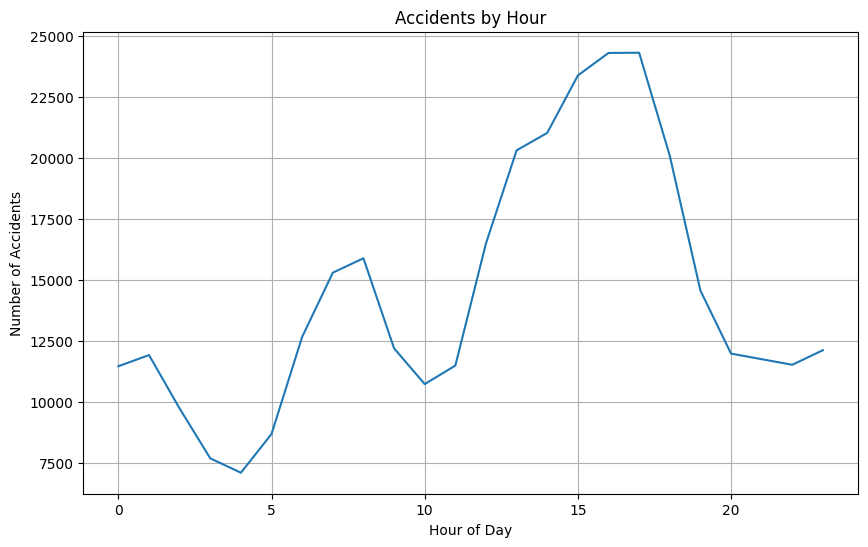

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 1. Time-of-Day Analysis

# Ensure 'Start_Time' is in datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Create the 'Hour' column by extracting the hour from the 'Start_Time' column
df['Hour'] = df['Start_Time'].dt.hour

# Now, you can perform the grouping and plotting
hourly_accidents = df.groupby('Hour').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()


Interpreting the Graph: Accidents by Hour

The graph shows a clear pattern in the number of accidents throughout the day. There are two distinct peaks:

1. Morning Rush Hour Peak:

The first peak occurs around 7-8 AM. This is likely due to the morning rush hour when traffic volume is high, and commuters are often in a hurry.
2. Evening Rush Hour Peak:

The second peak is much larger and occurs around 4-5 PM. This is likely due to the evening rush hour, when traffic volume is even higher, and people may be tired after a long day.
Other Observations:

The number of accidents is lowest during the early morning hours (around 3-5 AM) and late at night (after 10 PM). This is likely because there is less traffic on the roads during these times.
There is a slight increase in accidents around noon, which could be due to people taking lunch breaks and driving to restaurants or other destinations.
Overall Conclusion

The graph suggests that rush hour traffic is a major contributing factor to traffic accidents. Drivers should be extra cautious during these times and allow for extra travel time to avoid rushing.

Knowledge Gained from this Task

Data Analysis: We learned how to analyze data to identify patterns and trends.
Visualization: We learned how to create visualizations (graphs) to communicate findings effectively.
Traffic Safety: We gained insights into the factors that contribute to traffic accidents, which can help us to be more aware and take precautions to stay safe on the roads.

In [8]:
# 2. Severity Distribution under Different Weather Conditions
severity_weather = df.groupby(['Weather_Condition', 'Severity']).size().unstack()
severity_weather = severity_weather.fillna(0)

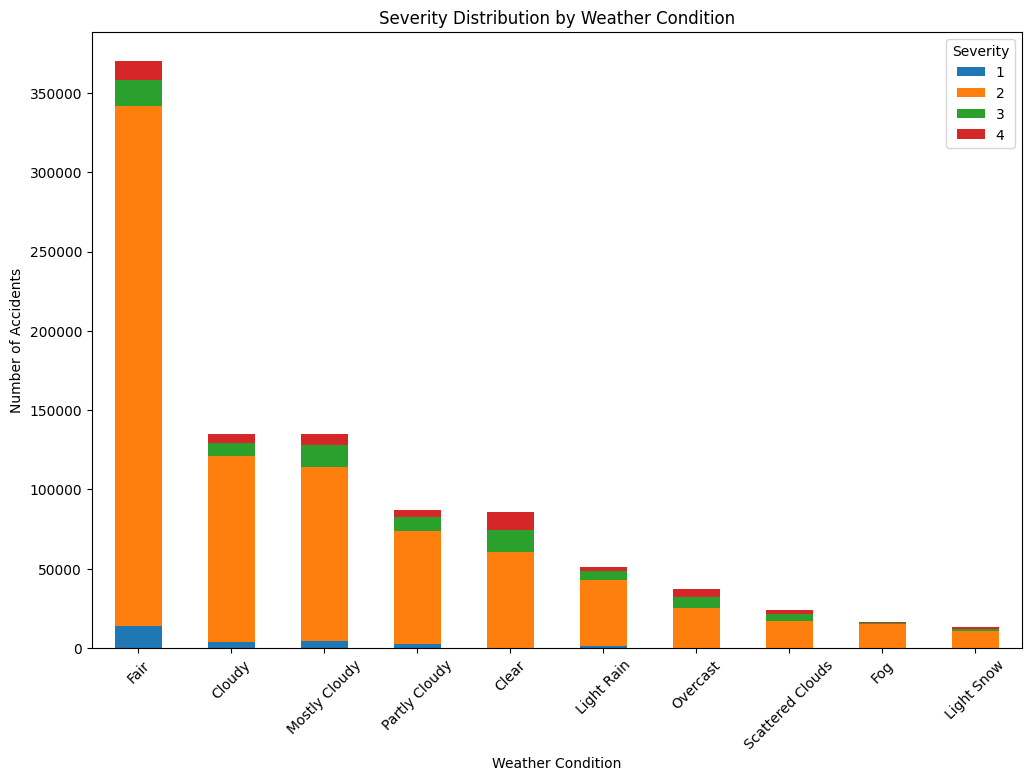

In [9]:
# Top 10 Weather Conditions
top_weather = severity_weather.sum(axis=1).sort_values(ascending=False).head(10)
severity_weather.loc[top_weather.index].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Severity Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

Interpreting the Graph: Severity Distribution by Weather Condition

This graph illustrates the distribution of accident severity levels across various weather conditions. Let's break down what we can observe:

Key Observations:

Fair Weather Dominance:

The most common weather condition for accidents is "Fair." This is understandable, as fair weather conditions are associated with higher traffic volumes.
However, the majority of accidents in fair weather are of lower severity (levels 1 and 2).
Severity Increase in Adverse Conditions:

As we move towards adverse weather conditions (cloudy, mostly cloudy, partly cloudy, etc.), the proportion of higher severity accidents (levels 3 and 4) increases.
This indicates that adverse weather significantly increases the risk of more severe accidents.
Extreme Weather Impact:

The highest proportion of severe accidents occurs during "Fog" and "Light Snow" conditions. This highlights the significant danger posed by these weather conditions.
Overall Conclusion

The graph suggests that while fair weather conditions are associated with the highest number of accidents, adverse weather conditions, particularly fog and light snow, significantly increase the risk of severe accidents. This emphasizes the importance of being cautious and adjusting driving behavior according to weather conditions.

Knowledge Gained from this Task

Data Analysis: We learned how to analyze data to identify patterns and trends in relation to weather conditions and accident severity.
Visualization: We learned how to create visualizations (graphs) to effectively communicate insights from the data.
Traffic Safety: We gained insights into the impact of weather conditions on accident severity, which can help us to be more aware and take precautions to stay safe on the roads.

In [11]:
import pandas as pd
from folium import Map, CircleMarker

# Subset the data for faster processing (optional)
df_sample = df.sample(n=1000)  # Reduce the number of points if the dataset is too large

# Create the map
hotspot_map = Map(location=[df_sample['Start_Lat'].mean(), df_sample['Start_Lng'].mean()], zoom_start=5)

# Add markers with progress feedback
for _, row in df_sample.iterrows():
    CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.7
    ).add_to(hotspot_map)

# Save the map to an HTML file
hotspot_map.save('accident_hotspots.html')


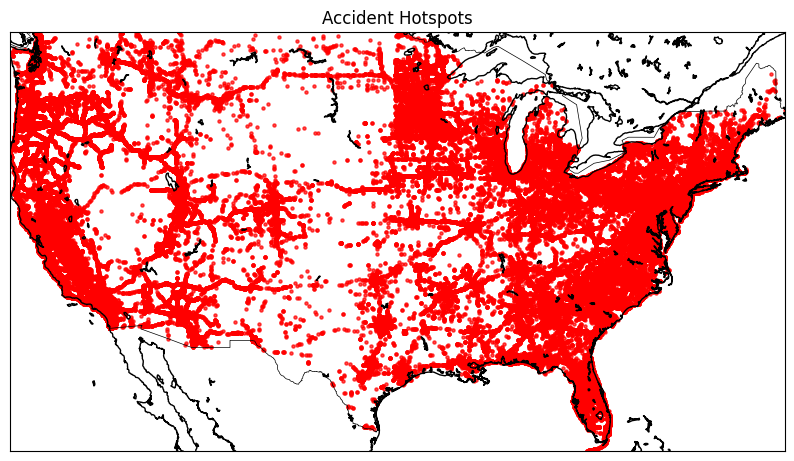

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set up the map
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', 
            llcrnrlat=df['Start_Lat'].min(), 
            urcrnrlat=df['Start_Lat'].max(),
            llcrnrlon=df['Start_Lng'].min(), 
            urcrnrlon=df['Start_Lng'].max(), 
            resolution='i')

m.drawcoastlines()
m.drawcountries()

# Scatter plot the points
x, y = m(df['Start_Lng'].values, df['Start_Lat'].values)
m.scatter(x, y, s=5, c='red', alpha=0.7)

# Add a title and save
plt.title("Accident Hotspots")
plt.savefig("accident_hotspots.png")
plt.show()


Interpretation

The map shows a high density of accidents along major highways and interstates, particularly in the eastern and central parts of the United States. There are also notable clusters in urban areas.

Key Observations

Road Network Concentration: Accidents are heavily concentrated along major highways and interstates, suggesting that high-traffic areas are more prone to accidents.
Urban Clusters: Dense clusters of accidents are observed in urban areas, likely due to increased traffic volume and complex road networks.
Regional Variations: The distribution of accidents seems to vary across regions. For example, the eastern and central US have more concentrated hotspots compared to the western regions.


Potential Contributing Factors

Traffic Volume: Higher traffic volume on major roads and in urban areas increases the likelihood of accidents.
Road Conditions: Poor road conditions, such as potholes, uneven surfaces, or inadequate signage, can contribute to accidents.
Weather Conditions: Adverse weather like rain, snow, fog, or icy roads can significantly increase accident risk.
Driver Behavior: Factors like speeding, distracted driving, and impaired driving can also play a significant role.
Knowledge Gained

By analyzing this map, we can gain valuable insights into the spatial distribution of accidents. This knowledge can be used to:

Identify high-risk areas: Focus safety efforts on areas with high accident concentrations.
Improve road infrastructure: Target areas with poor road conditions for maintenance and upgrades.
Implement traffic management strategies: Develop strategies to manage traffic flow and reduce congestion in accident-prone areas.
Enhance driver education: Educate drivers about the importance of safe driving practices and the risks associated with specific behaviors.
Inform public awareness campaigns: Raise awareness about the dangers of distracted driving, impaired driving, and other risky behaviors.



In conclusion, the accident hotspot map reveals a clear pattern of high accident density along major highways and urban areas. This suggests that factors such as traffic volume, road conditions, weather, and driver behavior likely contribute to these hotspots. By understanding these patterns, transportation authorities and policymakers can implement targeted safety measures to reduce accidents and improve road safety for all.